# Hypothesis Testing - Paired t-Test

### Objective
The objective is to conduct data analysis using a paired t-test with Python libraries. This work is aimed at assessing the statistical significance of differences between two population means based on real data - two exercises.

## 1. Paired t-Test
The **paired t-test** in Python can be both two-sided and one-sided, depending on the alternative hypothesis specified.
1. **Two-sided test:** In this case, the alternative hypothesis is formulated such that the means of the
two paired samples can be different in any direction (i.e., they are not equal). This is the most
common type of test and is used by default if not specified otherwise.
2. **One-sided test:** In this case, the alternative hypothesis is formulated such that the mean of one
sample is expected to be greater or less than the mean of the other sample. One-sided tests can
be "greater" (testing that the mean of the first sample is greater than the mean of the second
sample) or "less" (testing that the mean of the first sample is less than the mean of the second
sample).

This test is useful for comparing the means of two related groups to determine if there is a
statistically significant difference between them. It is commonly used in experimental studies
where the same subjects are measured before and after some intervention, or in observational
studies where pairs of matched subjects are used.

---

# Exercise 1: Cholesterol Level of Patients After Heart Attack
The cholesterol level of patients who had heart attacks was measured two days after the heart
attack and then again four days after the heart attack. The researchers want to see if the
cholesterol level of patients who have heart attacks reduces as the time since their heart attack
increases.
Do the data show that the mean cholesterol level of patients that have had a heart attack reduces
as the time increases since their heart attack? Use significance levels 0.05 and 0.1.


**Cholesterol Levels in mg/dL of Heart Attack Patients**
| Patients | Cholesterol Level Day 2 | Cholesterol Level Day 4 |
|----------|-------------------------|-------------------------|
| 1        | 270                     | 218                     |
| 2        | 236                     | 234                     |
| 3        | 210                     | 214                     |
| 4        | 142                     | 116                     |
| 5        | 280                     | 200                     |
| 6        | 272                     | 276                     |
| 7        | 160                     | 146                     |
| 8        | 220                     | 182                     |
| 9        | 225                     | 238                     |
| 10       | 242                     | 288                     |
| 11       | 186                     | 190                     |
| 12       | 266                     | 236                     |


## 1. Null and Alternative Hypotheses:
- **Null Hypothesis (H₀)**: There is no significant difference in the mean cholesterol level of patients two days after a heart attack compared to four days after a heart attack.
- **Alternative Hypothesis (H₁)**: There is a significant difference in the mean cholesterol level of patients two days after a heart attack compared to four days after a heart attack.

## 2. Assumptions:
- The data are paired (each patient's cholesterol level is measured both two days and four days after the heart attack).
- The cholesterol levels are normally distributed.
- The paired differences follow a normal distribution.
- The paired samples are independent of each other.

## 3. Test Statistic and p-value:
Using the `ttest_rel()` function from SciPy, we obtained the following results:
- t-statistic: 1.4810229369
- p-value: 0.1666667274

## 4. Conclusion:
With a significance level of 0.05, our p-value (0.1667) exceeds the threshold. Therefore, we fail to reject the null hypothesis. However, at a significance level of 0.1, the p-value approaches the threshold, indicating a marginally significant difference. 

## 5. Interpretation:
The p-value suggests that there is insufficient evidence to conclude a significant difference in cholesterol levels between two days and four days after a heart attack. However, the marginally significant p-value at the 10% significance level indicates that there may be a trend towards a difference. Further investigation with a larger sample size or additional time points may provide clearer insights into cholesterol level variations post-heart attack.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Paired t-test Results:
t-statistic: 1.4810229369
p-value: 0.1666667274
Fail to reject the null hypothesis.
There is no significant difference in cholesterol levels between two days and four days after a heart attack.


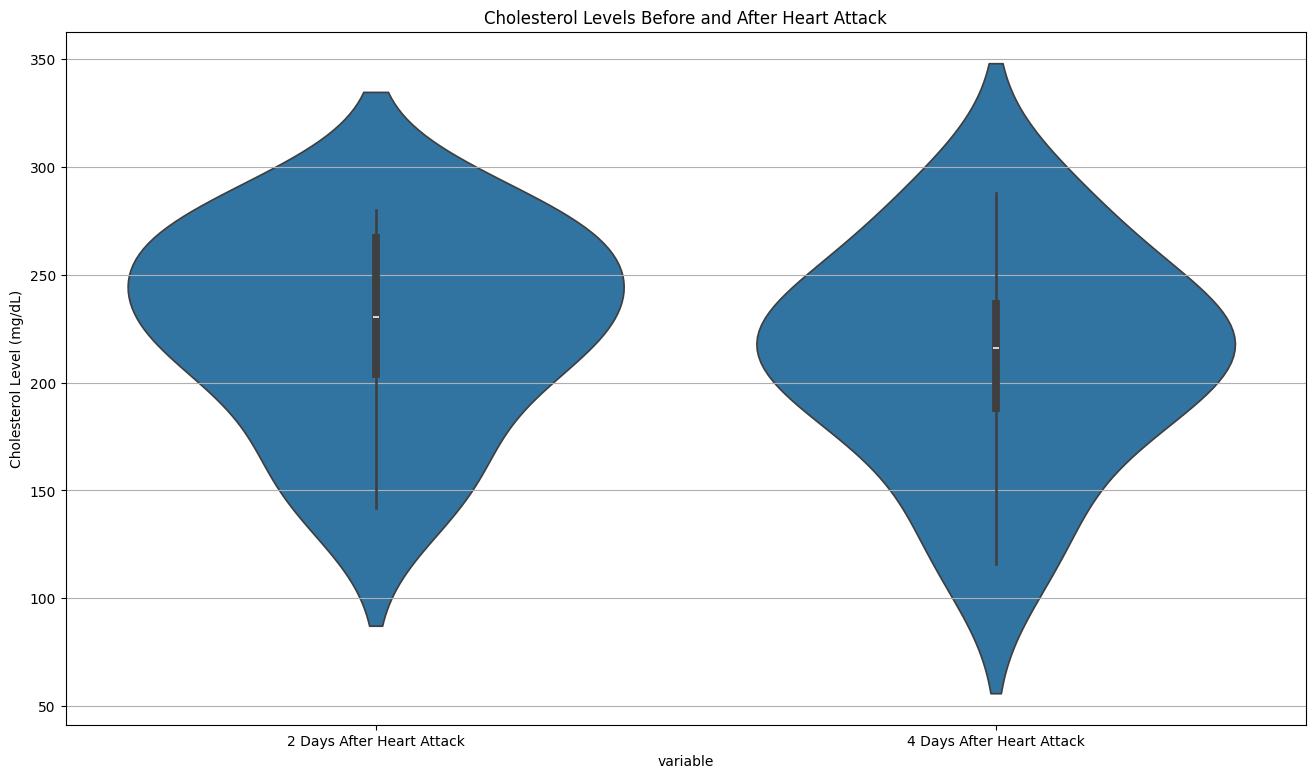

In [25]:
# Sample data (cholesterol levels in mg/dL)
cholesterol_data = {
    '2 Days After Heart Attack': [270, 236, 210, 142, 280, 272, 160, 220, 225, 242, 186, 266],
    '4 Days After Heart Attack': [218, 234, 214, 116, 200, 276, 146, 182, 238, 288, 190, 236]
}

# Create DataFrame
df_cholesterol = pd.DataFrame(cholesterol_data)

# Paired t-test
t_statistic, p_value = stats.ttest_rel(df_cholesterol['2 Days After Heart Attack'], df_cholesterol['4 Days After Heart Attack'])

# Significance levels
alpha_1 = 0.05
alpha_2 = 0.1

# Print test statistic and p-value
print("Paired t-test Results:")
print(f"t-statistic: {t_statistic:.10f}")
print(f"p-value: {p_value:.10f}")

# Interpretation
if p_value < alpha_1:
    print("Reject the null hypothesis at 5% significance level.")
    print("There is a significant difference in cholesterol levels between two days and four days after a heart attack.")
elif p_value < alpha_2:
    print("Reject the null hypothesis at 10% significance level.")
    print("There is some evidence of a difference in cholesterol levels between two days and four days after a heart attack.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in cholesterol levels between two days and four days after a heart attack.")

# Visualization - Violin plot
plt.figure(figsize=(16, 9))
df_cholesterol_melted = df_cholesterol.melt(value_name='Cholesterol Level (mg/dL)')
plt.title('Cholesterol Levels Before and After Heart Attack')
plt.ylabel('Cholesterol Level (mg/dL)')
plt.grid(True)
sns.violinplot(x='variable', y='Cholesterol Level (mg/dL)', data=df_cholesterol_melted)
plt.show()

---

# Exercise 2: Reiki Treatment for Pain Relief
To determine if Reiki is an effective method for treating pain, a pilot study was carried out where a
certified Reiki therapist provided treatment on volunteers. Pain was measured using a visual
analogue scale (VAS) immediately before and after the Reiki treatment
Do the data show that Reiki treatment reduces pain? Use significance levels 0.05 and 0.1.

**Pain Measures Before and After Reiki Treatment**
| VAS Before | VAS After |
|------------|-----------|
| 6          | 3         |
| 2          | 1         |
| 2          | 0         |
| 9          | 1         |
| 3          | 0         |
| 3          | 2         |
| 4          | 1         |
| 5          | 2         |
| 2          | 2         |
| 3          | 0         |
| 5          | 1         |
| 2          | 2         |


## 1. Null and Alternative Hypotheses:
- **Null Hypothesis (H₀)**: The mean pain level before Reiki treatment is equal to the mean pain level after Reiki treatment.
- **Alternative Hypothesis (H₁)**: The mean pain level before Reiki treatment is different from the mean pain level after Reiki treatment.

## 2. Assumptions:
- The data are paired (each participant's pain level is measured both before and after Reiki treatment).
- The pain levels are measured using a visual analogue scale (VAS).
- The paired differences follow a normal distribution.
- The paired samples are independent of each other.

## 3. Test Statistic and p-value:
Using the `ttest_rel()` function from SciPy, we obtained the following results:
- t-statistic: 4.1594645885
- p-value: 0.0015907879

## 4. Conclusion:
With a significance level of 0.05, our p-value (0.0016) is less than the threshold. Therefore, we reject the null hypothesis. This suggests that there is a significant reduction in pain level after Reiki treatment.

## 5. Interpretation:
The p-value indicates strong evidence against the null hypothesis, indicating a significant reduction in pain level after Reiki treatment. Therefore, Reiki treatment appears to be effective for pain relief based on the pilot study data.

Paired t-test Results:
t-statistic: 4.1594645885
p-value: 0.0015907879
Reject the null hypothesis at 5% significance level.
There is a significant reduction in pain level after Reiki treatment.


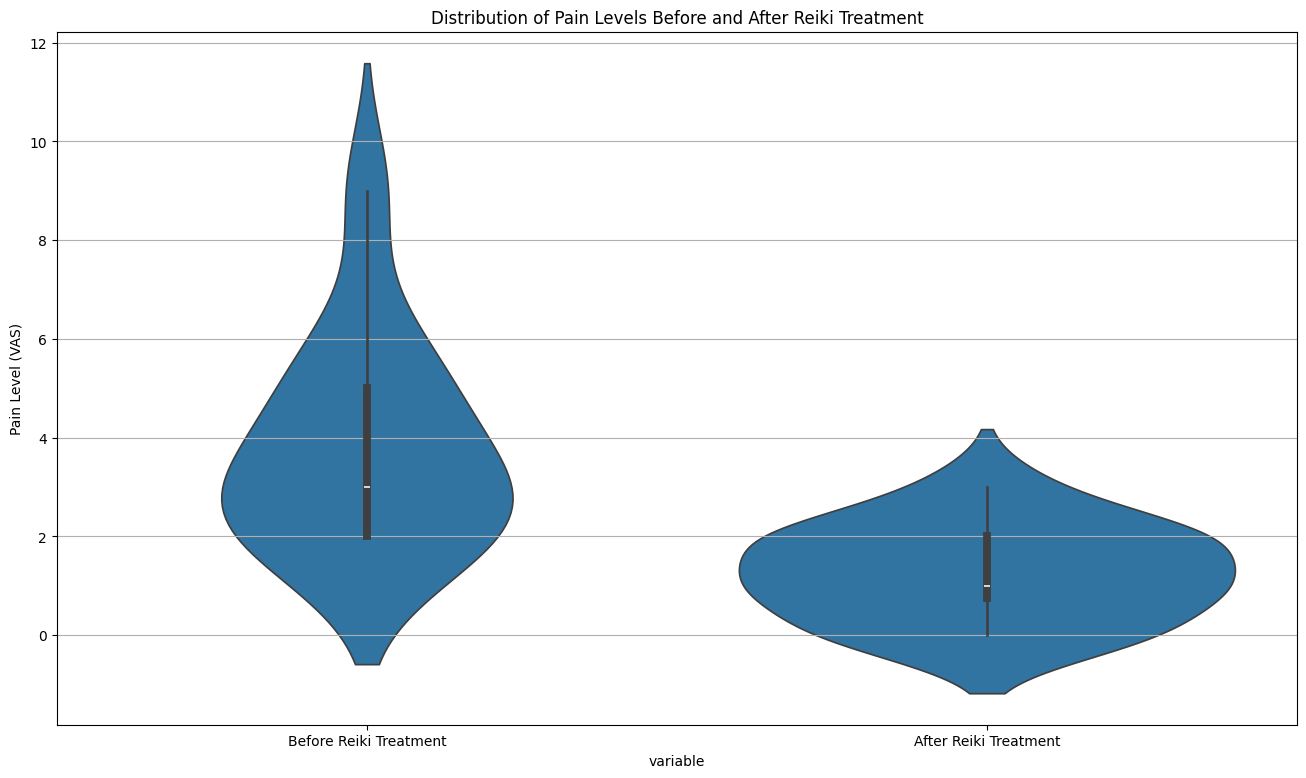

In [26]:
# Sample data (pain levels on VAS)
pain_data = {
    'Before Reiki Treatment': [6, 2, 2, 9, 3, 3, 4, 5, 2, 3, 5, 2],
    'After Reiki Treatment': [3, 1, 0, 1, 0, 2, 1, 2, 2, 0, 1, 2]
}

# Create DataFrame
df_pain = pd.DataFrame(pain_data)

# Paired t-test
t_statistic, p_value = stats.ttest_rel(df_pain['Before Reiki Treatment'], df_pain['After Reiki Treatment'])

# Significance levels
alpha_1 = 0.05
alpha_2 = 0.1

# Print test statistic and p-value
print("Paired t-test Results:")
print(f"t-statistic: {t_statistic:.10f}")
print(f"p-value: {p_value:.10f}")

# Interpretation
if p_value < alpha_1:
    print("Reject the null hypothesis at 5% significance level.")
    print("There is a significant reduction in pain level after Reiki treatment.")
elif p_value < alpha_2:
    print("Reject the null hypothesis at 10% significance level.")
    print("There is some evidence of a reduction in pain level after Reiki treatment.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant reduction in pain level after Reiki treatment.")

# Visualization - Violin plot
plt.figure(figsize=(16, 9))
df_pain_melted = df_pain.melt(value_name='Pain Level (VAS)')
plt.title('Distribution of Pain Levels Before and After Reiki Treatment')
plt.ylabel('Pain Level (VAS)')
plt.grid(True)
sns.violinplot(x='variable', y='Pain Level (VAS)', data=df_pain_melted)
plt.xticks([0, 1], ['Before Reiki Treatment', 'After Reiki Treatment'])
plt.show()